Mayra Diandra Nabila Ratnadi (3039839)

Michelle Espranita Liman (3072994)

In [168]:
from IPython.core.display import HTML
HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Language Technology / Sprachtechnologie
<br><br>
Wintersemester 2019/2020
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"Essay Scoring"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Thursday, 05.12.2019 (23:55 Uhr)</i>
</div>

In [169]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
import pandas as pd
from sklearn import datasets, svm, tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import sys
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import nltk
import re
import matplotlib.pyplot as plt

## Warm-up

<div class="task_description">
    <i class="task">Task 7.1:</i> <br>
</div>

Which of the following statements are true?

1. Character n-grams are more robust against grammatical errors than token n-grams.
2. Length features are always good in essay scoring.
3. Length features are more susceptible to cheating than n-gram features.
4. Essay scoring is potentially unfair to very creative learners.

<strong style="color: blue">Lösung: </strong>

1. Not necessarily: character n-grams are robust against spelling variation. With grammatical errors, the problem is often not that the word does not exist, but that the wrong form is used.
2. No, they are only a good indicator when essays are written under a time constraint.
3. True. You can influence length easily (repeating the same words over and over). For n-gram features you will probably have to cover some correct content.
4. True. If someone writes something we have never seen in the training data, the algorithm will probably not know what to do with it. If someone writes mainstream, chances are high we can score it more accurately.

## Features and Machine Learning

<div class="task_description">
    <i class="task">Task 7.2:</i> <br>
</div>

<div class="task_description">
   <i class="subtask">7.2.1</i> <i class="l1">L1</i> <br>
</div>
Import the following data file. It contains a number of linguistic features for essay scoring determined on the first prompt of the ASAP data record. 
<br> Output the NrofTokens feature.

In [170]:
df = pd.read_csv('featureFileAsap1.tsv', sep='\t')

In [171]:
df.head(20)

,AdjRatioFeature,AdvRatioFeature,ArtRatioFeature,CardRatioFeature,ConjRatioFeature,EndingAble,EndingAl,EndingFul,EndingIble,EndingIc,...,TokLenRatio,TypeTokenRatio,VRatioFeature,avgNumCharsSent,avgNumCharsToken,nrOfCommas,standardDevCharsPerSentence,standardDevCharsPerToken,standardDevTokensPerSentence,outcome
0.101370,0.086301,0.109589,0.006849,0.043836,1000,6.756757,17.567568,2.702703,0.000000,0.000000,...,1.0,0.419178,0.215068,4288.0,4.878082,0.0,0.0,2.702143,0.0,12
0.086310,0.056548,0.086310,0.005952,0.032738,1001,6.896552,10.344828,0.000000,0.000000,6.896552,...,1.0,0.443452,0.223214,1688.0,4.026866,0.0,0.0,2.144593,0.0,8
0.054755,0.100865,0.069164,0.000000,0.034582,1002,0.000000,26.315789,5.263158,0.000000,0.000000,...,1.0,0.449568,0.265130,1735.0,4.020173,0.0,0.0,2.068606,0.0,8
0.067568,0.067568,0.072973,0.000000,0.040541,1003,0.000000,0.000000,0.000000,8.000000,0.000000,...,1.0,0.383784,0.232432,2051.0,4.554348,0.0,0.0,2.133400,0.0,9
0.065476,0.083333,0.065476,0.005952,0.065476,1004,18.181818,0.000000,0.000000,0.000000,0.000000,...,1.0,0.660714,0.226190,941.0,4.607143,0.0,0.0,2.447145,0.0,6
0.040161,0.048193,0.064257,0.000000,0.048193,1005,0.000000,0.000000,10.000000,0.000000,0.000000,...,1.0,0.449799,0.244980,1417.0,4.698795,0.0,0.0,2.221120,0.0,9
0.047619,0.049887,0.081633,0.004535,0.029478,1006,14.285714,0.000000,9.523810,0.000000,0.000000,...,1.0,0.458050,0.249433,2386.0,4.426304,0.0,0.0,2.466030,0.0,8
0.086486,0.081081,0.110811,0.002703,0.056757,1007,0.000000,12.500000,9.375000,0.000000,0.000000,...,1.0,0.521622,0.218919,2092.0,4.659459,0.0,0.0,2.572774,0.0,10
0.096838,0.098814,0.079051,0.000000,0.041502,1008,0.000000,0.000000,0.000000,6.122449,0.000000,...,1.0,0.357708,0.243083,2545.0,4.023857,0.0,0.0,1.957660,0.0,10
0.037296,0.118881,0.062937,0.000000,0.041958,1009,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.426573,0.265734,2285.0,4.324766,0.0,0.0,2.006914,0.0,8


<strong style="color: blue">Lösung: </strong>

In [172]:
f1 = df['NrofTokens'].values
print(f1)

[730. 336. 347. ... 590. 350. 449.]


You can plot the individual features across the different total scores.

No handles with labels found to put in legend.


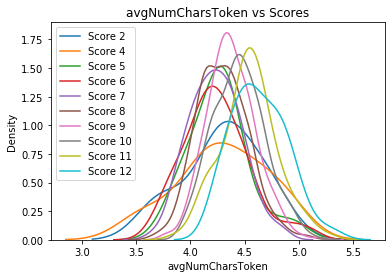

In [173]:
label ='avgNumCharsToken'
plt.legend(prop={'size': 12})
plt.title(label+' vs Scores')
plt.xlabel(label)
plt.ylabel('Density')
data = df[df.outcome == 2]
sns.distplot(data[label], hist = False, kde = True, label='Score 2')
data = df[df.outcome == 4]
sns.distplot(data[label], hist = False, kde = True, label='Score 4')
data = df[df.outcome == 5]
sns.distplot(data[label], hist = False, kde = True, label='Score 5')
data = df[df.outcome == 6]
sns.distplot(data[label], hist = False, kde = True, label='Score 6')
data = df[df.outcome == 7]
sns.distplot(data[label], hist = False, kde = True, label='Score 7')
data = df[df.outcome == 8]
sns.distplot(data[label], hist = False, kde = True, label='Score 8')
data = df[df.outcome == 9]
sns.distplot(data[label], hist = False, kde = True, label='Score 9')
data = df[df.outcome == 10]
sns.distplot(data[label], hist = False, kde = True, label='Score 10')
data = df[df.outcome == 11]
sns.distplot(data[label], hist = False, kde = True, label='Score 11')
data = df[df.outcome == 12]
sns.distplot(data[label], hist = False, kde = True, label='Score 12')

plt.show()

<div class="task_description">
   <i class="subtask">7.2.2</i> <i class="l1">L1</i> <br>
</div>

Compare the plots for the three features, NrofTokens (essay length), avgNumCharsToken (word length) and PronounRatioI (what proportion of pronouns is 'I'). Which feature separates the different essay levels particularly well and which does not?

<strong style="color: blue">Lösung: </strong>

Essay length works particularly well, the pronoun feature does not work well.

<div class="task_description">
   <i class="subtask">7.2.3</i> <i class="l2">L2</i> <br>
</div>

Train a Decision Tree Model on the data with last week's code and evaluate.

<strong style="color: blue">Lösung: </strong>

In [174]:
x = df.iloc[:, 1:len(df.columns)-1]
y = df.iloc[:, [len(df.columns)-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

c_tree = DecisionTreeClassifier(max_depth=4)
c_tree.fit(x_train, y_train)

predicted = list(c_tree.predict(x_test))
gold = list(y_test.loc[:, "outcome"])
print(classification_report(gold,predicted))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.57      1.00      0.73         4
           5       0.00      0.00      0.00         5
           6       0.64      0.70      0.67        23
           7       0.46      0.37      0.41        30
           8       0.68      0.76      0.72       142
           9       0.30      0.24      0.26        68
          10       0.34      0.56      0.43        54
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        10

    accuracy                           0.52       357
   macro avg       0.36      0.42      0.38       357
weighted avg       0.47      0.52      0.49       357



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<div class="task_description">
    <i class="task">Task 7.3:</i> <br>
</div>
The following code reads the essays from the first prompt of the ASAP dataset and their corresponding scores.

In [175]:
df = pd.read_csv('prompt1.tsv', sep='\t')
essays = df['text']
y = df['score1'].values

# Essays are randomly split into 75% training data nd 25% test data
essays_train, essays_test, y_train, y_test = train_test_split(essays, y, test_size=0.25, random_state=1000)

In [176]:
df.head(20)

,id,prompt,text,score1
0,1,1,"Dear local newspaper, I think effects computer...",4
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5
4,5,1,"Dear @LOCATION1, I know having computers has a...",4
5,6,1,"Dear @LOCATION1, I think that computers have a...",4
6,7,1,Did you know that more and more people these d...,5
7,8,1,@PERCENT1 of people agree that computers make ...,5
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",4
9,10,1,In the @LOCATION1 we have the technology of a ...,5


We convert the texts into a matrix of token counts based on the words in the training data. <br>
This is a vector that counts for each word in the train data how often it occurs in an essay:

In [177]:
vectorizer = CountVectorizer()
vectorizer.fit(essays_train)
X_train = vectorizer.transform(essays_train)
X_test  = vectorizer.transform(essays_test)

<div class="task_description">
   <i class="subtask">7.3.1</i> <i class="l2">L2</i> <br>
</div>

Print the shape of the train and test data. <br> How many essays do we have? How many features does each essay have?

<strong style="color: blue">Lösung: </strong>

In [178]:
print(X_train.shape)
print(X_test.shape)

(1337, 13349)
(446, 13349)


1337 training essays, 446 test essays, 13349 features

First we use a standard shallow learning classifier on these features

In [179]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
pred = classifier.predict(X_test)
print("Accuracy:", score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.5089686098654709


We also print a confusion matrix, with the lines being the true labels:

In [180]:
print(confusion_matrix(y_test, pred))

[[  1   0   2   0   0   0]
 [  0   1   6   2   0   0]
 [  0   0  12  28   4   0]
 [  0   0  17 154  51   1]
 [  0   0   1  67  58  11]
 [  0   0   0  13  16   1]]


Now we build our first neural model. <br> We add two layers after the input: the first one with 10 nodes, the second one with 6 nodes, one per possible class. We print the summary of the model.

In [181]:
model = Sequential()
input_dim = X_train.shape[1]
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                133500    
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 66        
Total params: 133,566
Trainable params: 133,566
Non-trainable params: 0
_________________________________________________________________


We transform the output value to vectors, instead of '3' We would like to have '[0,0,1,0,0,0]'

In [182]:
y_test_orig = y_test
y_train = np.interp(y_train, (1, 6), (0, 5))
y_test = np.interp(y_test, (1, 6), (0, 5))
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Now we do the actual training, we train 10 times on the training data.

In [183]:
model.fit(X_train, y_train,
                     epochs=10,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=10)

Train on 1337 samples, validate on 446 samples
Epoch 1/10
1337/1337 [==============================] - 0s 328us/step - loss: 1.4274 - accuracy: 0.3949 - val_loss: 1.2100 - val_accuracy: 0.5471
Epoch 2/10
1337/1337 [==============================] - 0s 247us/step - loss: 0.9299 - accuracy: 0.6387 - val_loss: 1.0507 - val_accuracy: 0.5628
Epoch 3/10
1337/1337 [==============================] - 0s 232us/step - loss: 0.6763 - accuracy: 0.7502 - val_loss: 1.0627 - val_accuracy: 0.5740
Epoch 4/10
1337/1337 [==============================] - 0s 235us/step - loss: 0.5190 - accuracy: 0.8265 - val_loss: 1.0713 - val_accuracy: 0.5583
Epoch 5/10
1337/1337 [==============================] - 0s 232us/step - loss: 0.4049 - accuracy: 0.8841 - val_loss: 1.1171 - val_accuracy: 0.5605
Epoch 6/10
1337/1337 [==============================] - 0s 243us/step - loss: 0.3202 - accuracy: 0.9274 - val_loss: 1.1678 - val_accuracy: 0.5673
Epoch 7/10
1337/1337 [==============================] - 0s 245us/step - loss:

We evaluate the loss on the training data and on the validation data.

In [184]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

1337/1337 [==============================] - 0s 63us/step
Training Accuracy: 0.9888
446/446 [==============================] - 0s 62us/step
Testing Accuracy:  0.5448


<div class="task_description">
   <i class="subtask">7.3.2</i> <i class="l1">L1</i> <br>
</div>

Observe how the performance develops. Can you explain what is going on here?

<strong style="color: blue">Lösung: </strong>

We overfit on the training data, i.e. our training performance gets better, but we fit so specifically on the training data, that our performance on the test data does not improve anymore.

___
We now get the predictions on the test data and compute a confusion matrix.

In [185]:
pred = model.predict(X_test)
predarray = []
for p in pred:
    predarray.append(p.argmax()+1)
print(confusion_matrix(y_test_orig, predarray))

[[  0   0   1   2   0   0]
 [  0   0   5   4   0   0]
 [  0   0   8  34   2   0]
 [  0   0   9 173  41   0]
 [  0   0   1  73  62   1]
 [  0   0   0  12  18   0]]


In the first net, we represented each essays with an feature vector of fixed length, a BOW model. <br>
Now we represent our input as a sequence of tokens, each token is represented by its index.

In [186]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(essays_train)

X_train = tokenizer.texts_to_sequences(essays_train)
X_test = tokenizer.texts_to_sequences(essays_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index                                                                                                   

With CountVectorizer, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). With Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index.
 <br> <br>
 ___
 We consider only the first 500 words per essay, if there are less words, we pad the remaining words with 0s.




In [187]:
maxlen = 500
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

embedding_dim = 50
model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()
history = model2.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model2.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

pred = model2.predict(X_test)
predarray = []
for p in pred:
    predarray.append(p.argmax()+1)
print(confusion_matrix(y_test_orig, predarray))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 50)           689750    
_________________________________________________________________
flatten_4 (Flatten)          (None, 25000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                250010    
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 66        
Total params: 939,826
Trainable params: 939,826
Non-trainable params: 0
_________________________________________________________________
Train on 1337 samples, validate on 446 samples
Epoch 1/20
1337/1337 [==============================] - 0s 331us/step - loss: 1.0186 - accuracy: 0.5961 - val_loss: 0.9150 - val_accuracy: 0.6121
Epoch 2/20
1337/1337 [==============================]

In the following variant of the model, we use pretrained word-embeddings.

In [188]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix


embedding_dim = 100
embedding_matrix = create_embedding_matrix(
     '/path/to/glove/glove.6B.100d.txt',
     tokenizer.word_index, embedding_dim)


model3 = Sequential()
model3.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model3.add(layers.Flatten())
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(6, activation='softmax'))
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model3.summary()
history = model3.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model3.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

pred = model3.predict(X_test)
predarray = []
for p in pred:
    predarray.append(p.argmax()+1)
print(confusion_matrix(y_test_orig, predarray))

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/glove/glove.6B.100d.txt'

<div class="task_description">
   <i class="subtask">7.3.3</i> <i class="l2">L2</i> <br>
</div>

Try to play with some of the parameters: Should we use longer or shorter essays lengths? A different number of hidden units? An additional hidden layer?

## Overall evaluation

<div class="task_description">
    <i class="task">Task 7.4:</i>  <br>
</div>

The following code omputes linearly and quadratically weighted kappa (Set weight to „linear“ or „quadratic“).

In [ ]:
cohen_kappa_score(y1, y2, labels=None, weights=None, sample_weight=None) 

Given is the following confusion matrix. Lines are true values. 

In [ ]:
array=[[20, 5, 10],[15, 20, 5],[10, 20, 10]]
df_cm = pd.DataFrame(array, index = [i for i in "012"],
                     columns = [i for i in "012"])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm, annot=True,cmap="Blues")

<div class="task_description">
   <i class="subtask">7.4.1</i> <i class="l1">L1</i> <br>
</div>

Compute the accuracy and the kappa for the confusion matrix above.

<strong style="color: blue">Lösung: </strong>

In [ ]:
gold0 = [0] * 35 + [1] * 40 + [2] * 40
pred0 = [0] * 20 + [1] * 5 + [2] * 10 + [0] * 15 + [1] * 20 + [2] * 5 + [0] * 10 + [1] * 20 + [2] * 10

print(confusion_matrix(gold0, pred0))
print("Accuracy: ",accuracy_score(gold0, pred0, normalize=True, sample_weight=None))
print("Kappa: ",cohen_kappa_score(gold0, pred0, weights='quadratic'))

<div class="task_description">
   <i class="subtask">7.4.2</i> <i class="l1">L1</i> <br>
</div>
Can you find a different confusion matrix, which has the same label distribution in the gold standard, the same accuracy, but a better QWK (Quadratic Weighted Kappa)?

<strong style="color: blue">Lösung: </strong>

In [ ]:
gold1 = [0] * 35 + [1] * 40 + [2] * 40
pred1 = [0] * 20 + [1] * 5 + [2] * 10 + [0] * 15 + [1] * 20 + [2] * 5 + [0] * 0 + [1] * 30 + [2] * 10

print(confusion_matrix(gold1, pred1))
print("Accuracy: ",accuracy_score(gold1, pred1, normalize=True, sample_weight=None))
print("Kappa: ",cohen_kappa_score(gold1, pred1, weights='quadratic'))

A better matrix has less entries in the extreme cases (0-2, 2-0) while having the same number of gold standard instances per class.

<div class="task_description">
   <i class="subtask">7.4.3</i> <i class="l1">L1</i> <br>
</div>

Can you find one with a worse QWK? 

<strong style="color: blue">Lösung: </strong>

In [ ]:
gold2 = [0] * 35 + [1] * 40 + [2] * 40
pred2 = [0] * 20 + [1] * 0 + [2] * 15 + [0] * 15 + [1] * 20 + [2] * 5 + [0] * 10 + [1] * 20 + [2] * 10

print(confusion_matrix(gold2, pred2))
print("Accuracy: ",accuracy_score(gold2, pred2, normalize=True, sample_weight=None))
print("Kappa: ",cohen_kappa_score(gold2, pred2, weights='quadratic'))

# Homework

<div class="task_description">
    <i class="task">7.1.</i> :::10 Homework points:::
</div>


The following code makes a one-hot feature vector out of an essay and classifies it. 

In [189]:
my_essay = 'this is an example essay.'
X_testing = tokenizer.texts_to_sequences([my_essay])
X_testing = pad_sequences(X_testing, padding='post', maxlen=maxlen)
print(model2.predict(X_testing).argmax()+1)

1


<div class="task_description">
   <i class="subtask">7.1.1.</i> <br>
</div>

Try to write a text that gets very high scores and a text that receives very low scores.

A text with a very high score

In [204]:
my_essay1 = '''I strongly believe that computers play a huge role in human lives, especially in the last @NUM1 years. What I define as a computer is any device that can execute complex calculations with ease. Because of the great advantages it offers, it is available to us today in various forms – laptops, smartphones, notebooks. A computer helps us access an unlimited amount of information, makes us aware of everything that is happening around the world (even faraway countries like @LOCATION1, @LOCATION2 and @LOCATION3), automates redundant processes that would otherwise be time-consuming and is one of the biggest sources of entertainment. Although beneficial in many ways, computers can be misused with false motives. For example, data protection has been a huge issue in @LOCATION4 because it is feasible for people to hack into computers and steal others’ data on transactions, basic personal information, and even browsing habits! This data could then be used to the hacker’s advantage to expose internet users to advertisements on products that they would very likely be interested in.
As an adolescent, what I would really like to address is the impact of computers on our development into adulthood. Lots of people I know spend hours on their computer screens playing games, browsing and watching videos. It is so easy to access entertainment that we allow ourselves be unproductive. As a result, we depend on our computers to give us instantaneous answers to our questions, starting from stupid ones to real-life problems. 
That aside, I think we are a lucky generation as information is often available for us for free. Back then, people only have access to a lot of knowledge if they are privileged and go to a prestigious school. It is fortunately not the case nowadays. We only need a computer and an internet connection. Even Youtube has been an extremely useful resource and practical platform to learn. Take @PERSON1 for example. He was the one that brilliantly taught me the basics of neural networks. It was such a complex concept, but the way he explains it makes the impossible simple. Not to mention the other @NUM2 videos that have helped me face exams. There is no more excuse for us to be ignorant and lazy, really! Why? We have computers! Modern computers!
In conclusion, as with everything in life, computers are extremely beneficial in our lives if we know how to use them in a respective manner. However, computers can also be destructive if used with bad pretentions.
'''

In [205]:
X_testing1 = tokenizer.texts_to_sequences([my_essay1])
X_testing1 = pad_sequences(X_testing1, padding='post', maxlen=maxlen)
print(model2.predict(X_testing1).argmax()+1)

5


We believe the word "computer" plays a huge role in the scoring, so we tried to put quite a lot of that. We also think that conjunctions like "and", "because", "however", etc are very important, also correct spelling, punctuation, and named entity tags as there were quite some of them in the high scoring essays. We also tried using a wide range of vocabulary, because it indicates eloquency and intelligence. And lastly, we wrote a sufficiently long text as short essays did not produce good scores according to the dataset.

A text with a very low score

In [206]:
my_essay2 = '''
Cmputers r ez 2 use n i relly dont think no one doesnt understand how 2 use it bc it would be really crazy not to be able to use it omg
'''

In [207]:
X_testing2 = tokenizer.texts_to_sequences([my_essay2])
X_testing2 = pad_sequences(X_testing2, padding='post', maxlen=maxlen)
print(model2.predict(X_testing2).argmax()+1)

1


Very short essays with very limited range of vocabulary and bad spelling and punctuation produce low scores, and that is how we approached this.

<div class="task_description">
   <i class="subtask">7.1.2.</i> <br>
</div>

Can you write something that does not make sense to a human but still receives high scores?

In [210]:
my_essay3 = '''
Dear local, back popular are computers since @TIME1 they are so awesome you like it but I don’t this is weird do you understand me. You me it use every hour day and night because happy. Social media bad is, however useful. I feel my sister @PERSON1 use computer all the time. She look at it dance sometimes boyfriend. Do I or not otherwise, I don’t think. Homeworks it helped me, but teacher give bad grade, as I copy. Mathematics has increased because of Youtube videos, watch I lot of them. Something unfortunately unclear, just search and results out. I do it all the time even though mommy not like. She say, it make people stupid and lazy. I don’t agree I can write essays like this. Computer impact lives many students and teachers at my school, so many computers in a room. Phones are also computers because I can see everything inside phone like computer. Google translate very important, as I watch Spanish dramas I like and don’t understand but can translate. I cannot survive without computer and internet I will miss everything what my friends do at school and at the mall. They will go shop and everywhere without me because I can’t see message. I want be fashionable like themselves and Pinterest teach. Scroll and like pictures that inspire so I can also dress nice. But often so expensive I can’t afford, still there are discounts everywhere. I also like @PERSON2 song and sing he’s so handsome but cute but hot but married to @PERSON2. Selena is sad I saw on computer she sang Lose You To Love Me but off key because painful. Way way back back dated them before the weekend. But of course broken celebrities, so often happen. But I like her very much and happy, because without computers I don’t know her and Justin also Hailey. Concerts also I go to music I listen and dance laugh like tis. Then I post on Instagram, celebrities repost. So bored I hate homework but I have to do so I can have money buy clothes Pinterest, but hope this is finished. High score I am glad but low I also get money. If not I sell computer? No no I cannot, my teacher nice! Or not I find rich handsome boyfriend buy a ton of computers, but too heavy. I can build army of computer robots and attack skull and holiday all the time. Hurt my brain think tis because wrong. Computer good but me bad, sorry so sorry. Are is am not I right or wrongful thou? Make sense must I don’t because computer grade this stupid.
'''

In [211]:
X_testing3 = tokenizer.texts_to_sequences([my_essay3])
X_testing3 = pad_sequences(X_testing3, padding='post', maxlen=maxlen)
print(model2.predict(X_testing3).argmax()+1)

4


We tried to use a sufficient amount of different words to indicate vocabulary knowledge, however these sentences are not properly structured when considered alone or in relation to other sentences, so lack of coherence is what we were trying to achieve, while avoiding spelling and punctuation errors. Grammar does not seem like a big problem as there are lots of grammar mistakes anyway. The text is also sufficiently long, because short essays result in low grades.

<div class="task_description">
   <i class="subtask">7.1.3.</i> <br>
</div>

Can you write something that should be correct and receives low scores?

In [212]:
my_essay4 = '''
I think that computers are very influential in our lives, as they are the source of data, the intelligent units that processes things fast and help us calculate things easily. It is unimaginable to live without them in this demanding world because almost every job requires some computer knowledge, and amazing job opportunities will definitely be missed if these skills are learned. It is important for us to adapt to computer technology, for example through training and building our own projects.
'''

In [213]:
X_testing4 = tokenizer.texts_to_sequences([my_essay4])
X_testing4 = pad_sequences(X_testing4, padding='post', maxlen=maxlen)
print(model2.predict(X_testing4).argmax()+1)

2


This text is theoretically correct in grammar, spelling, punctuation, coherence and has quite a good vocabulary, however too short to achieve a high score.

____
For each task, describe how you proceeded. <br><br><br>
__Remember we are in prompt 1:__ <br>
<br>*More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. They teach hand-eye coordination, give people the ability to learn about faraway places and people, and even allow people to talk online with other people. Others have different ideas. Some experts are concerned that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends.*
<br><br>
*Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.*
<br><br>
You may have a look at the full scoring guidelines for this prompt.